# Correlação e regressão

In [1]:
import pandas as pd
import numpy as np

# para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# para cálculos estatísticos e testes de hipóteses
import scipy.stats as stats

# para modelos estatísticos
import statsmodels.formula.api as smf

In [2]:
camaras = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/camaras.csv')

camaras.head(3)

,processo,assunto,camara,relator,origem,comarca,polo_mp,decisao,unanimidade,dt_publicacao,ementa,tempo,rel_idade,rel_id_municipio_nasc,rel_faculdade_direito,rel_tempo_magistratura,rel_tipo_magistrado,rel_quinto
0,00013452120188260535,DIREITO PENAL - Crimes contra o Patrimônio - R...,01ª Câmara de Direito Criminal,MÁRIO DEVIENNE FERRAZ,Comarca de Guarulhos / Foro de Guarulhos / 4ª ...,GUARULHOS,Passivo,Parcialmente,Unânime,2020-03-13,N/A (TJSP; Apelação Criminal 0001345-21.2018....,2.195756,70.598220,3534708.0,Faculdade Católica de Direito de Santos,44.900753,desembargador,não
1,00647287520158260050,DIREITO PENAL - Crimes Previstos na Legislação...,07ª Câmara de Direito Criminal,ALBERTO ANDERSON FILHO,Comarca de São Paulo / Foro Central Criminal B...,SAO PAULO,Passivo,Negaram,Unânime,2016-08-02,APELAÇÃO CRIMINAL – Tráfico de entorpecentes ...,1.585216,69.590691,3509502.0,Faculdade de Direito da Pontifícia Universidad...,35.835729,desembargador,não
2,00039169220148260150,DIREITO PENAL-Crimes contra o Patrimônio-Aprop...,14ª Câmara de Direito Criminal,FERNANDO TORRES GARCIA,Comarca de Cosmópolis / Foro de Cosmópolis / 1...,COSMOPOLIS,Passivo,Negaram,Unânime,2020-04-27,APELAÇÃO CRIMINAL – Apropriação indébita qual...,6.318960,64.763860,3550308.0,Faculdade de Direito da Universidade de São Paulo,40.027379,desembargador,não


## Introdução

Até agora, vimos uma introdução à teoria de testes de hipóteses. Os testes de hipóteses são a base de diversos avanços científicos feitos ao longo do século XX, como a testagem de procedimentos médicos e tratamentos, a avaliação de políticas públicas, a análise de dados de pesquisas de mercado, entre outros.

No entanto, o teste de hipóteses, sozinho, não é suficiente para obter esses avanços. Isso acontece porque a realidade costuma ser mais complexa do que algo que pode ser resumido em uma única variável. Por exemplo, imagine que você está interessado em saber se a proporção de decisões favoráveis de um juiz é diferente da proporção de decisões favoráveis de outro juiz. Você pode realizar um teste de hipóteses para comparar as proporções, mas isso não te dá informações sobre quais aspectos podem levar um juiz a ser mais ou menos favorável a determinados casos do que outros.

O que está relacionado com o tempo dos processos? O que está relacionado com o valor de uma indenização? Quais são os condicionantes de uma decisão judicial? Para responder a essas perguntas, é necessário ir além do teste de hipóteses e explorar a relação entre variáveis. Neste notebook, vamos explorar duas formas de fazer isso: a correlação e a regressão (que é uma forma de generalizar a correlação).

## Correlação

Correlação é uma medida estatística que descreve a relação entre duas variáveis **numéricas**. A correlação é uma medida de associação linear entre duas variáveis. Em outras palavras, a correlação mede o quanto uma variável varia em relação à outra. 

A correlação é uma medida que varia de -1 a 1. Quando a correlação é 1, as variáveis estão perfeitamente correlacionadas positivamente, ou seja, quando uma aumenta, a outra também aumenta. Quando a correlação é -1, as variáveis estão perfeitamente correlacionadas negativamente, ou seja, quando uma aumenta, a outra diminui. Quando a correlação é 0, as variáveis não estão correlacionadas.

https://www.guessthecorrelation.com/

<div><img src="image.png" width=600/></div>

A fórmula da correlação é dada por:

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Explicando a fórmula: $r$ é a correlação entre as variáveis $x$ e $y$, $x_i$ e $y_i$ são os valores das variáveis $x$ e $y$ para a observação $i$, $\bar{x}$ e $\bar{y}$ são as médias das variáveis $x$ e $y$, respectivamente, e $n$ é o número de observações.

Uma forma mais simples de escrever a fórmula da correlação é pensar nas variâncias e covariância das variáveis:

$$
r = \frac{cov(x, y)}{\sqrt{var(x)var(y)}}
$$

As fórmulas acima são equivalentes. A covariância mede o quanto duas variáveis variam juntas, enquanto a variância mede o quanto uma variável varia sozinha. A correlação é a covariância normalizada pela variância das variáveis.

### Exemplo no python

Vamos calcular a correlação entre a idade de um desembargador e o tempo de magistratura.

In [3]:
relatores = (
  camaras
  .drop_duplicates('relator')
  .query('rel_idade.isnull() == False and rel_tempo_magistratura.isnull() == False', engine='python')
)

relatores.head(3)


,processo,assunto,camara,relator,origem,comarca,polo_mp,decisao,unanimidade,dt_publicacao,ementa,tempo,rel_idade,rel_id_municipio_nasc,rel_faculdade_direito,rel_tempo_magistratura,rel_tipo_magistrado,rel_quinto
0,00013452120188260535,DIREITO PENAL - Crimes contra o Patrimônio - R...,01ª Câmara de Direito Criminal,MÁRIO DEVIENNE FERRAZ,Comarca de Guarulhos / Foro de Guarulhos / 4ª ...,GUARULHOS,Passivo,Parcialmente,Unânime,2020-03-13,N/A (TJSP; Apelação Criminal 0001345-21.2018....,2.195756,70.598220,3534708.0,Faculdade Católica de Direito de Santos,44.900753,desembargador,não
1,00647287520158260050,DIREITO PENAL - Crimes Previstos na Legislação...,07ª Câmara de Direito Criminal,ALBERTO ANDERSON FILHO,Comarca de São Paulo / Foro Central Criminal B...,SAO PAULO,Passivo,Negaram,Unânime,2016-08-02,APELAÇÃO CRIMINAL – Tráfico de entorpecentes ...,1.585216,69.590691,3509502.0,Faculdade de Direito da Pontifícia Universidad...,35.835729,desembargador,não
2,00039169220148260150,DIREITO PENAL-Crimes contra o Patrimônio-Aprop...,14ª Câmara de Direito Criminal,FERNANDO TORRES GARCIA,Comarca de Cosmópolis / Foro de Cosmópolis / 1...,COSMOPOLIS,Passivo,Negaram,Unânime,2020-04-27,APELAÇÃO CRIMINAL – Apropriação indébita qual...,6.318960,64.763860,3550308.0,Faculdade de Direito da Universidade de São Paulo,40.027379,desembargador,não


Agora vamos fazer um gráfico de dispersão

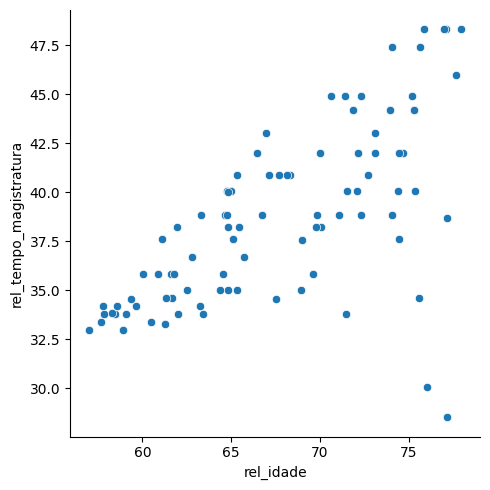

In [4]:
sns.relplot(data=relatores, x='rel_idade', y='rel_tempo_magistratura')

Note que parece existir uma relação linear entre as variáveis. Vamos calcular a correlação para confirmar essa hipótese.

In [5]:
correlacao = relatores['rel_idade'].corr(relatores['rel_tempo_magistratura'])

correlacao

0.6476657995825739

Note que a correlação é uma função comutativa, ou seja, a correlação entre x e y é a mesma que a correlação entre y e x:

In [6]:
correlacao_2 = relatores['rel_tempo_magistratura'].corr(relatores['rel_idade'])

correlacao_2

0.6476657995825738

Como testar a significância da correlação? Para isso, podemos usar um teste de hipóteses. A hipótese nula é que a correlação é igual a 0, e a hipótese alternativa é que a correlação é diferente de 0. O teste de hipóteses para a correlação é um teste t de Student, já que temos um resultado bem parecido com o teste de comparação de médias.

Para isso, utilizamos o método `pearsonr` da biblioteca `scipy.stats`. Esse método retorna a correlação e o p-valor do teste de hipóteses.

In [7]:
corr, p_value = stats.pearsonr(relatores['rel_idade'], relatores['rel_tempo_magistratura'])

corr, p_value

(0.6476657995825736, 5.235066377782658e-12)

Nesse caso, o valor-p é menor que 0.05, então rejeitamos a hipótese nula e concluímos que a correlação é estatisticamente significante.

### Outliers e correlação

Veja que no gráfico temos alguns pontos que estão bem longe do padrão. Esses pontos são chamados de outliers. Os outliers podem influenciar a correlação, já que eles podem afetar a relação linear entre as duas quantidades, como vimos no jogo *guess the correlation*.

Quando isso acontece, é importante investigar a origem desses pontos. Eles podem ser erros de medição, erros de digitação, ou podem ser realmente pontos com um comportamento diferente do padrão geral, o que poderia indicar estudos de caso interessantes. Em análises do direito, estudar outliers pode ser interessante para estudar casos em que o direito foi aplicado de forma diferente do padrão e, assim, aprimorar nosso entendimento sobre o fenômeno jurídico.

Por exemplo, no estudo [Observatório do Mercado de Capitais: Conselho de Recursos do Sistema Financeiro Nacional](https://abjur.github.io/obsCRSFN/relatorio/obs_crsfn_abj_files/figure-html/multas-comparacao-1.png), a ABJ analisou os recursos interpostos no Conselho de Recursos do Sistema Financeiro Nacional (CRSFN), também chamado de Conselhinho. A análise identificou 2 casos em que o valor da multa após revisão do caso foi maior do que o valor original. No sistema judiciário, isso não deveria ser possível, já que isso violaria o princípio do *non reformatio in pejus*. A verdade é que essa regra não se aplica ao CRSFN, já que ele é um órgão administrativo e não um órgão judicial. Isso mostra que a análise de outliers pode ser uma ferramenta poderosa para entender o sistema jurídico.

<img src="https://abjur.github.io/obsCRSFN/relatorio/obs_crsfn_abj_files/figure-html/multas-comparacao-1.png" width="800" />

No nosso caso das câmaras, podemos investigar os outliers aplicando alguma regra para detectar os casos:

In [8]:
relatores.query('rel_tempo_magistratura < 32')

,processo,assunto,camara,relator,origem,comarca,polo_mp,decisao,unanimidade,dt_publicacao,ementa,tempo,rel_idade,rel_id_municipio_nasc,rel_faculdade_direito,rel_tempo_magistratura,rel_tipo_magistrado,rel_quinto
31,30376156820138260405,DIREITO PENAL-Crimes contra o Patrimônio-Recep...,06ª Câmara de Direito Criminal,RICARDO TUCUNDUVA,Comarca de Osasco / Foro de Osasco / 4ª Vara C...,OSASCO,Passivo,Negaram,Unânime,2017-02-24,N/A (TJSP; Apelação Criminal 3037615-68.2013....,4.147844,76.000000,3550308.0,Faculdade de Direito da Universidade de São Paulo,30.047912,desembargador,sim
93,00421315820128260005,DIREITO PENAL - Lesão Corporal - Decorrente de...,12ª Câmara de Direito Criminal,ANGÉLICA DE ALMEIDA,Comarca de São Paulo / Foro Regional de São Mi...,SAO PAULO,Passivo,Punibilidade Extinta,Unânime,2018-02-23,N/A (TJSP; Apelação Criminal 0042131-58.2012....,6.146475,77.144422,3552205.0,Faculdade de Direito da Pontifícia Universidad...,28.509240,desembargador,sim


A explicação, nesse caso, é que os desembargadores vieram do quinto constitucional e, portanto, podem não ter tanto tempo de magistratura.

### Correlação e causalidade

Uma discussão muito comum em estatística é a diferença entre correlação e causalidade. Correlação é uma medida de associação entre duas variáveis, enquanto causalidade é uma relação de causa e efeito entre duas variáveis. A correlação não implica causalidade. Em outras palavras, só porque duas variáveis estão correlacionadas, não significa que uma causa a outra.

Um site muito legal para explorar correlações espúrias é o [Spurious Correlations](https://www.tylervigen.com/spurious-correlations), que mostra correlações absurdas entre variáveis, como a relação quase perfeita entre o número de roubos no Alaska e o salário dos professores nos EUA.

<img src="https://www.tylervigen.com/spurious/correlation/image/2723_robberies-in-alaska_correlates-with_professor-salaries-in-the-us.svg" width="600" />

Outro ponto importante é que o fato de duas variáveis terem uma correlação baixa não significa que elas não tenham uma relação (causal ou não). O [problema de Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) é um exemplo clássico disso. O problema de Anscombe é um conjunto de 4 datasets que têm a mesma média, variância, correlação e regressão linear. No entanto, os gráficos são completamente diferentes. Isso mostra que a correlação não é suficiente para descrever a relação entre duas variáveis.

Outro exemplo contemporâneo mais divertido é o Datasaurus Dozen, que mostra 12 datasets com a mesma média, variância e correlação, mas com gráficos completamente diferentes:

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*uzVmvgn7I-t9x5MTByQg_A.gif" width="600" />

Se quiser ver mais detalhes do Datasaurus Dozen, você pode acessar [este post do Medium](https://medium.com/@marc.bolle/datasaurus-dozen-visualization-using-python-d328dad64d20).

## Regressão

A regressão vai um pouco além da correlação, permitindo tracejar uma linha que melhor se ajusta aos dados. A regressão é uma técnica estatística que permite modelar a relação entre uma variável **dependente** e uma ou mais variáveis **independentes**. A regressão pode ser pensada como uma generalização da correlação, já que a correlação é um caso especial de regressão, onde temos apenas uma variável independente. A maior parte dos estudos, tanto na academia quanto no mercado, utiliza regressão para entender a relação entre variáveis. Por exemplo, modelos preditivos de resultados de processos e até mesmo ferramentas avançadas como LLMs utilizam o framework de regressão como a base de tudo.

A regressão linear simples é o modelo de regresão mais simples que existe, e modela a relação entre uma variável dependente e uma variável independente. O fato de ser simples não significa que ele é inútil. Muitos problemas do mundo real podem ser modelados com uma regressão linear simples, e ela é a base para os modelos mais complexos.

A regressão linear é dada pela fórmula:

$$
y = \beta_0 + \beta_1x + \epsilon
$$

Onde $y$ é a variável dependente, $x$ é a variável independente, $\beta_0$ é o intercepto, $\beta_1$ é o coeficiente angular, e $\epsilon$ é o erro. O objetivo da regressão é encontrar os valores de $\beta_0$ e $\beta_1$ que minimizam o erro $\epsilon$.

Precisamos detalhar melhor o que é variável dependente e independente. A variável dependente é aquilo que queremos prever, que queremos explicar. Por exemplo, se queremos prever o valor de uma indenização, o valor da indenização é a variável dependente. A variável independente é aquilo que usamos para prever a variável dependente. Por exemplo, se queremos prever o valor de uma indenização, podemos usar o valor da causa, o local de distribuição, juiz do caso, o tipo de ação, entre outros, como variáveis independentes. Por enquanto, vamos considerar apenas uma variável independente, mas a regressão pode ser generalizada para mais variáveis independentes.

No nosso caso, a variável dependente é o tempo de magistratura e a variável independente é a idade do desembargador. A pergunta de pesquisa é: o tempo de magistratura é influenciado pela idade do desembargador? Intuitivamente, parece que sim, já que desembargadores mais velhos tendem a ter mais tempo de magistratura. Também vimos que a correlação entre as variáveis é positiva, o que corrobora essa intuição. Agora, vamos **quantificar** essa relação.

Para ajustar nossa regressão, vamos utilizar um novo pacote: o `statsmodels`. O `statsmodels` é uma biblioteca de Python que permite fazer análises estatísticas mais avançadas, como regressão, séries de tempo, entre outros. A função que vamos usar por enquanto é a `ols`, que significa Ordinary Least Squares, ou Mínimos Quadrados Ordinários. Essa função ajusta uma regressão linear simples aos dados.


In [9]:
modelo = smf.ols('rel_tempo_magistratura ~ rel_idade', data=relatores).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     rel_tempo_magistratura   R-squared:                       0.419
Model:                                OLS   Adj. R-squared:                  0.413
Method:                     Least Squares   F-statistic:                     63.59
Date:                    Sun, 07 Apr 2024   Prob (F-statistic):           5.24e-12
Time:                            20:01:05   Log-Likelihood:                -237.78
No. Observations:                      90   AIC:                             479.6
Df Residuals:                          88   BIC:                             484.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2034      4.070      1.524      0.131      -1.884      14.291
rel_idade      0.4789      0.060      7.974      0.000       0.360       0.598
==============================================================================
Omnibus:                       35.274   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.330
Skew:                          -1.346   Prob(JB):                     8.93e-21
Kurtosis:                       7.168   Cond. No.                         762.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O sumário do modelo tem mais detalhes que o necessário para interpretar o modelo, mas ainda assim é muito interessante. Vamos focar nos coeficientes, que são as estimativas para os valores de $\beta_0$ e $\beta_1$ que minimizam o erro da equação acima. 

* O coeficiente de idade é 0.5, o que significa que, para cada ano a mais de idade, o tempo de magistratura aumenta em 0.5 anos. O coeficiente de idade é estatisticamente significante, já que o valor-p associado a ele é menor que 0.05. O teste de hipóteses para o coeficiente de idade é um teste t de Student, assim como o teste de hipóteses para a correlação, e o resultado desses testes é o mesmo.

* O intercepto é 6.2, o que significa que, para um desembargador de 0 anos, o tempo de magistratura é de 6.2 anos. O intercepto não é estatisticamente significante, já que o valor-p é maior que 0.05. Nesse caso, realmente o intercepto não faz muito sentido, já que não existem desembargadores de 0 anos de idade.

A outra informação mais importante do sumário é o $R^2$ (`r-squared`). O $R^2$ é uma medida de quão bem o modelo se ajusta aos dados, mostrando qual o percentual da variabilidade dos dados é explicado pelo modelo.

O $R^2$ varia de 0 a 1, e quanto mais próximo de 1, melhor o modelo se ajusta aos dados. O $R^2$ é uma medida de qualidade do modelo, e é muito importante para avaliar a qualidade de um modelo de regressão.

Você pode se perguntar: a interpretação $R^2$ e do coeficiente de correlação são muito parecidos, não é? A única diferença é que o $R^2$ é sempre positivo, enquanto a correlação pode ser negativa. E de fato essa intuição faz sentido: para uma regressão linear simples (ou seja, com uma variável independente), o $R^2$ é o quadrado da correlação entre as variáveis:

In [10]:
correlacao = relatores['rel_idade'].corr(relatores['rel_tempo_magistratura'])

r2 = modelo.rsquared

correlacao ** 2, r2

(0.4194709879489347, 0.41947098794893445)

No entanto, o $R^2$ é uma medida mais geral, que pode ser aplicada a modelos de regressão mais complexos, com mais variáveis independentes. O $R^2$ pode ser pensado como uma medida de qualidade do modelo, enquanto a correlação é uma medida de associação entre variáveis.

Para visualizar a regressão, podemos fazer um gráfico de dispersão com a linha de regressão. Para isso, vamos usar a função `lmplot` que plota o gráfico de dispersão e a linha de regressão.

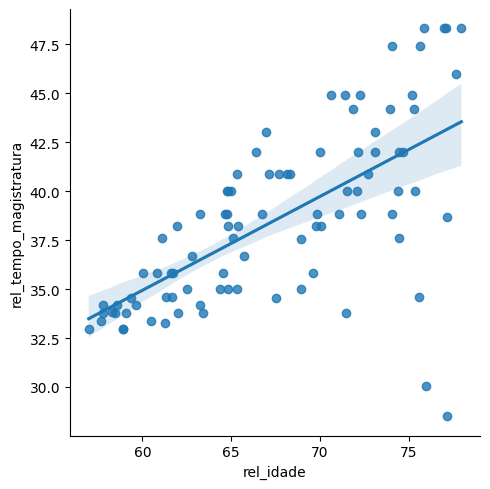

In [11]:
sns.lmplot(data=relatores, x='rel_idade', y='rel_tempo_magistratura')

Na figura, a mancha azul em torno da linha de regressão é a banda de confiança da regressão. A banda de confiança é uma faixa em torno da linha de regressão que mostra a incerteza do modelo. Quanto mais larga a banda de confiança, menos confiante o modelo é naquele ponto. Note que a dispersão dos dados é maior nas idades mais avançadas dos desembargadores, o que é refletido na banda de confiança.

### Nota histórica e referências

O nome "Ordinary Leasts Squares" vem do chamado método dos mínimos quadrados, que é o procedimento matemático para encontrar os valores de $\beta_0$ e $\beta_1$ que melhor se ajustam aos dados. O método dos mínimos quadrados foi desenvolvido por Legendre e Gauss no início do século XIX, e é um dos métodos mais importantes da estatística. 

O método dos mínimos quadrados é um método de otimização, que é uma técnica matemática para encontrar o melhor valor de uma função. Na prática, definimos um problema de otimização (uma função de perda + um método de minimização da perda) para cada modelo. Por exemplo, em um modelo de redes neurais, podemos ter diferentes funções de perda (como a entropia cruzada) e diferentes métodos de minimização (como a descida de gradiente).

O método dos mínimos quadrados é um dos métodos de otimização mais simples, mas é muito poderoso e é a base de muitos modelos estatísticos.

Se tiver mais interesse sobre o tema, recomendamos o livro [Introduction to Statistical Learning](https://www.statlearning.com/), que é um livro introdutório sobre aprendizado estatístico e que é muito bom para quem quer aprender mais sobre regressão e outros modelos estatísticos.

<img src="https://images.squarespace-cdn.com/content/v1/5ff2adbe3fe4fe33db902812/8b373fbe-d1b4-4351-b803-0d3cd5bba1b0/ISLP_cover.png" width="300" />

### Regressão linear múltipla

A regressão linear simples pode ser generalizada para mais variáveis independentes. A regressão linear múltipla é dada pela fórmula:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p + \epsilon
$$

Nosso interesse agora é estudar o tempo dos processos em função da idade do desembargador e do polo do Ministério Público. Para isso, vamos ajustar um modelo de regressão linear múltipla com uma variável dependente (tempo do processo, em anos) e duas variáveis independentes (idade do desembargador e polo do Ministério Público).

In [12]:
modelo_tempo = smf.ols('tempo ~ rel_idade + polo_mp', data=camaras).fit()

modelo_tempo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     15.20
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           2.57e-07
Time:                        20:01:06   Log-Likelihood:                -18762.
No. Observations:                8608   AIC:                         3.753e+04
Df Residuals:                    8605   BIC:                         3.755e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.0376      0.277     14.575      0.000       3.495       4.581
polo_mp[T.Passivo]    -0.4478      0.085     -5.268      0.000      -0.614      -0.281
rel_idade             -0.0066      0.004     -1.652      0.099      -0.014       0.001
==============================================================================
Omnibus:                     4063.861   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27633.729
Skew:                           2.169   Prob(JB):                         0.00
Kurtosis:                      10.631   Cond. No.                         806.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Veja que, agora, temos dois coeficientes: um para a idade do desembargador e outro para o polo do Ministério Público. O coeficiente de idade é -0.007, o que significa que, para cada ano a mais de idade, o tempo do processo reduz em 0.007 anos (aproximadamente 3 dias). Note que o valor não é estatisticamente significante, já que o valor-p associado a ele, de 0.099, é maior que 0.05. O coeficiente de polo é -0.448, o que significa que, quando o polo do MP é passivo, o tempo do processo reduz em 0.448 dias. O coeficiente de polo é estatisticamente significante, já que o valor-p associado a ele é menor que 0.05.

Nesse caso, o $R^2$ é 0.004, o que significa que o modelo explica menos de 1% da variabilidade dos dados. O $R^2$ é bem baixo, o que significa que o modelo não consegue representar completamente o tempo dos processos. O valor do $R^2$ pode ser usada como um indicativo da qualidade do ajuste, mas não deve ser usado como a única medida de qualidade do modelo. Outras análises de diagnóstico e discussões com especialistas são necessárias para avaliar a qualidade do modelo.

Note que, além do $R^2$, temos o $R^2$ ajustado. O $R^2$ ajustado é uma versão do $R^2$ que penaliza a inclusão de variáveis independentes no modelo. O $R^2$ ajustado é uma medida mais conservadora da qualidade do modelo, já que penaliza a inclusão de variáveis independentes desnecessárias. No nosso caso, o $R^2$ ajustado é 0.003. Quando temos um modelo com diversas variáveis independentes, **recomenda-se usar o $R^2$ ajustado**.

## Regressão logística

A regressão logística é uma generalização da regressão linear para variáveis dependentes categóricas. A regressão logística é usada quando a variável dependente é binária, ou seja, tem apenas dois valores possíveis. A regressão logística é dada pela fórmula:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p)}}
$$

Onde $p$ é a probabilidade de a variável dependente ser 1, $e$ é o número de Euler (aproximadamente 2.71828), e $\beta_0, \beta_1, ..., \beta_p$ são os coeficientes da regressão. A interpretação dos coeficientes é a mesma da regressão linear: o coeficiente $\beta_1$ é a mudança na probabilidade de a variável dependente ser 1 para uma unidade a mais de $x_1$, mantendo todas as outras variáveis constantes.

Para entender a fórmula, vamos olhar um caso com apenas uma variável independente. Nesse caso, a fórmula da regressão logística é:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}} = g(\beta_0 + \beta_1x)
$$

Veja que, ainda que a relação entre a variável de interesse (dependente) e a variável explicativa (independente) tenha uma forma estranha, a relação entre a variável de interesse e a variável explicativa ainda é linear. Por isso que a regressão logística faz parte da classe de "modelos lineares generalizados".

### Exemplo no python

Agora, vamos fazer uma aplicação da regressão logística. Nosso interesse é estudar a probabilidade da parte autora aceitar um acordo a partir de um valor que oferecemos a ela em um caso de direito do consumidor. Na nossa base de dados, temos uma lista de processos similares, contendo 

* o valor do acordo oferecido, como uma proporção do valor da causa (no mercado, esse valor é chamado de valor de alçada). Esse valor varia de 0 a 1, e representa a proporção do valor da causa que estamos oferecendo à parte autora;
* a informação sobre o tipo de caso: se envolve dano moral ou dano material;
* se a parte autora aceitou ou não o acordo.

A ideia é estabelecer uma relação entre o valor do acordo e a aceitação do acordo, controlando pelo tipo de caso. Para isso, vamos ajustar um modelo de regressão logística com duas variáveis independentes: o valor da proposta de acordo (alçada) e o tipo de caso. A variável dependente é a aceitação do acordo, ou seja, uma variável binária que indica se a parte autora aceitou ou não o acordo.

In [14]:
acordos = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/acordos.csv')

# nomes originais: Valor de Alçada,	Tipo de Caso,	Aceita Acordo
acordos.rename(columns={
  'Valor de Alçada': 'valor_alcada',
  'Tipo de Caso': 'tipo_caso',
  'Aceita Acordo': 'aceita_acordo'}, inplace=True)

acordos.head(10)

,valor_alcada,tipo_caso,aceita_acordo
0,0.374540,0,0
1,0.950714,1,1
2,0.731994,1,0
3,0.598658,1,0
4,0.156019,1,0
5,0.155995,0,0
6,0.058084,1,0
7,0.866176,0,1
8,0.601115,0,0
9,0.708073,0,1


In [15]:
modelo_logistico = smf.logit('aceita_acordo ~ valor_alcada + tipo_caso', data=acordos).fit()

modelo_logistico.summary()

Optimization terminated successfully.
         Current function value: 0.280667
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          aceita_acordo   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                  0.4647
Time:                        20:01:07   Log-Likelihood:                -280.67
converged:                       True   LL-Null:                       -524.36
Covariance Type:            nonrobust   LLR p-value:                1.456e-106
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.6311      0.541    -14.104      0.000      -8.692      -6.571
valor_alcada     9.6214      0.690     13.941      0.000       8.269      10.974
tipo_caso        0.0727      0.213      0.342      0.733      -0.344       0.490
================================================================================
"""

Vamos interpretar os resultados do modelo.

O coeficiente de alçada é 9.621, o que significa que, para cada unidade a mais de alçada, a chance de a parte autora aceitar o acordo aumenta (a interpretação da magnitude desse aumento é mais complicada e não veremos por enquanto). O coeficiente de alçada é estatisticamente significante, já que o valor-p associado a ele é menor que 0.05. 

O coeficiente do tipo de caso ser dano moral é 0.213, o que significa que, para casos de dano moral, a probabilidade de a parte autora aceitar o acordo aumenta. O coeficiente de dano moral não é estatisticamente significante, já que o valor-p associado a ele, de 0.73, é maior que 0.05.

Já que a probabilidade de aceitação não depende do tipo de caso, podemos simplificar o modelo e ajustar um modelo de regressão logística apenas com a alçada:

In [16]:
modelo_logistico = smf.logit('aceita_acordo ~ valor_alcada', data=acordos).fit()

modelo_logistico.summary()

Optimization terminated successfully.
         Current function value: 0.280725
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          aceita_acordo   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                  0.4646
Time:                        20:01:07   Log-Likelihood:                -280.73
converged:                       True   LL-Null:                       -524.36
Covariance Type:            nonrobust   LLR p-value:                5.568e-108
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.5893      0.526    -14.434      0.000      -8.620      -6.559
valor_alcada     9.6114      0.689     13.950      0.000       8.261      10.962
================================================================================
"""

Agora que temos o valor final do modelo, podemos fazer uma interpretação mais direta. Podemos fazer um gráfico representando a relação entre a alçada e a probabilidade de aceitação do acordo:

<Axes: xlabel='valor_alcada', ylabel='probabilidade'>

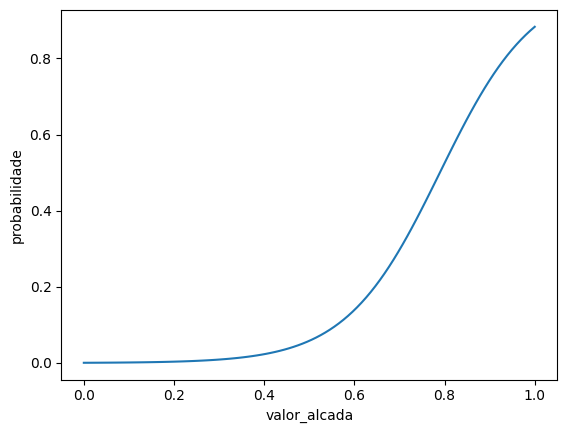

In [17]:
x = np.linspace(0, 1, 100)
y = modelo_logistico.predict(pd.DataFrame({'valor_alcada': x}))

df_predict = pd.DataFrame({'valor_alcada': x, 'probabilidade': y})

sns.lineplot(data=df_predict, x='valor_alcada', y='probabilidade')

Pelo gráfico, vemos que a probabilidade de aceitação do acordo aumenta com o valor da alçada. Um valor de alçada abaixo de 40% do valor da causa implica em probabilidades ínfimas de aceitação do acordo, enquanto um valor de alçada próximo de 100% implica em uma aceitação maior de 80% do acordo, apesar desse valor não ser interessante para a parte ré. O valor ótimo de acordo é um trade-off entre a probabilidade de aceitação e a expectativa do resultado do processo pela parte ré.